In [117]:
import sys
import os
import pandas as pd
import datetime as dt
from dotenv import load_dotenv
import pyodbc
import numpy as np
import matplotlib.pyplot as plt
import psycopg2
import seaborn as sns
from sqlalchemy import create_engine
os.chdir('..')
from db_connection.connection import PostgresConnection
from src.df_cleaner import *
from src.df_outlier_handler import OutlierHandler

In [91]:
import warnings
warnings.filterwarnings('ignore')


In [92]:
db = PostgresConnection(dbname='postgres', user='postgres', password='postgres')
db.connect()

# load BOA App review data 
query = "SELECT * FROM banks_data"
result = db.execute_query(query)


df = pd.DataFrame(result, columns=[desc[0] for desc in db.cursor.description])
#print(df.head()) 
#db.close_connection()


Connected to PostgreSQL database!


# General Statistics

In [93]:
df.size

816

In [94]:
df.head()

,post_link,date,views,post_time,bank,time_of_day
0,https://t.me/tikvahethiopia/70382,2022-05-19,310300,13:47:14,#CBE,afternoon
1,https://t.me/tikvahethiopia/70383,2022-05-19,310300,13:47:14,#CBE,afternoon
2,https://t.me/tikvahethiopia/73378,2022-08-30,267400,11:13:05,#CBE,morning
3,https://t.me/tikvahethiopia/73379,2022-08-30,267400,11:13:05,#CBE,morning
4,https://t.me/tikvahethiopia/74556,2022-11-03,347100,16:07:35,#CBE,afternoon


In [95]:
df.shape

(136, 6)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   post_link    136 non-null    object
 1   date         135 non-null    object
 2   views        136 non-null    int64 
 3   post_time    135 non-null    object
 4   bank         136 non-null    object
 5   time_of_day  135 non-null    object
dtypes: int64(1), object(5)
memory usage: 6.5+ KB


In [97]:
df.describe()

,views
count,136.000000
mean,272208.823529
std,35069.289024
min,193500.000000
25%,249700.000000
50%,267400.000000
75%,298325.000000
max,347100.000000


# Missing Values

In [98]:
percent_missing_values(df)

The dataset contains 0.37 % missing values.


In [102]:
df.isnull().sum()

post_link      0
date           1
views          0
post_time      1
bank           0
time_of_day    1
dtype: int64

In [103]:
df = df.fillna(value = 0)
df

,post_link,date,views,post_time,bank,time_of_day
0,https://t.me/tikvahethiopia/70382,2022-05-19,310300,13:47:14,#CBE,afternoon
1,https://t.me/tikvahethiopia/70383,2022-05-19,310300,13:47:14,#CBE,afternoon
2,https://t.me/tikvahethiopia/73378,2022-08-30,267400,11:13:05,#CBE,morning
3,https://t.me/tikvahethiopia/73379,2022-08-30,267400,11:13:05,#CBE,morning
4,https://t.me/tikvahethiopia/74556,2022-11-03,347100,16:07:35,#CBE,afternoon
...,...,...,...,...,...,...
131,https://t.me/tikvahethiopia/87071,2024-04-21,311800,11:52:03,#CBE,morning
132,https://t.me/tikvahethiopia/87116,2024-04-23,245400,06:51:39,#CBE,morning
133,https://t.me/tikvahethiopia/87117,2024-04-23,245400,06:51:39,#CBE,morning
134,https://t.me/tikvahethiopia/87629,2024-05-13,259700,17:11:15,#Hibretbank,afternoon


In [104]:
percent_missing_values(df)

The dataset contains 0.0 % missing values.


# Univariate Analysis

In [106]:
unique_counts = df['views'].nunique()
unique_counts

106

In [113]:
unique_counts = df['bank'].nunique()
unique_counts

5

In [114]:
unique_counts = df['time_of_day'].nunique()
unique_counts

4

# Experiment

In [119]:
counts_df = df['bank'].value_counts()
counts_df

bank
#CBE                   85
#GlobalBankEthiopia    27
#Hibretbank            15
#AwashBank              5
#WegagenBank            4
Name: count, dtype: int64

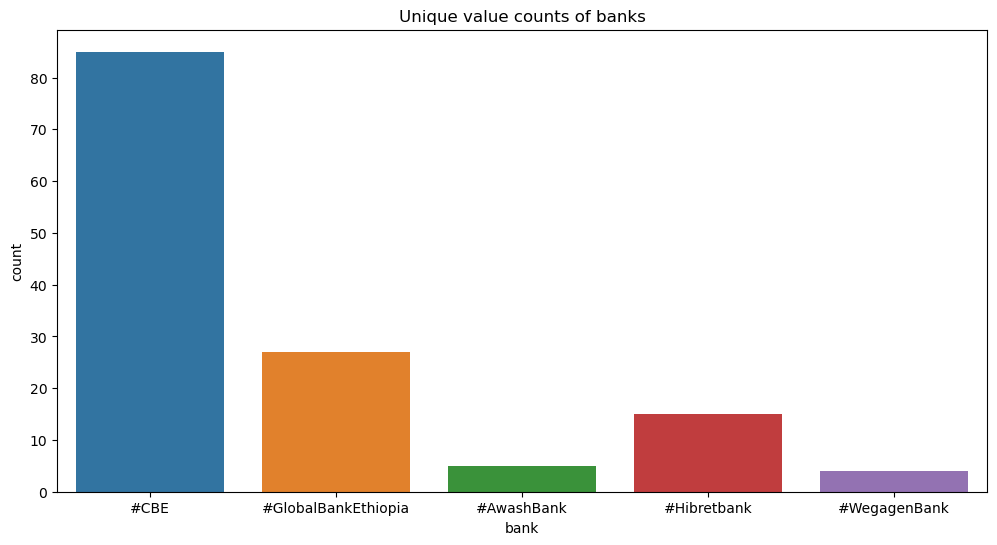

In [121]:
plt.figure(figsize=(12, 6))
plt.title('Unique value counts of banks')
sns.countplot(data=df, x='bank')
plt.show()

In [ ]:
df["at"] = pd.to_datetime(df["at"])
df["at"] 

# Outliers

In [123]:
user_engagement_df = df[['post_link', 'date', 'views', 'post_time','bank','time_of_day']]
user_engagement_df.head()

,post_link,date,views,post_time,bank,time_of_day
0,https://t.me/tikvahethiopia/70382,2022-05-19,310300,13:47:14,#CBE,afternoon
1,https://t.me/tikvahethiopia/70383,2022-05-19,310300,13:47:14,#CBE,afternoon
2,https://t.me/tikvahethiopia/73378,2022-08-30,267400,11:13:05,#CBE,morning
3,https://t.me/tikvahethiopia/73379,2022-08-30,267400,11:13:05,#CBE,morning
4,https://t.me/tikvahethiopia/74556,2022-11-03,347100,16:07:35,#CBE,afternoon


In [124]:
outlier_handler = OutlierHandler(user_engagement_df)

<Axes: >

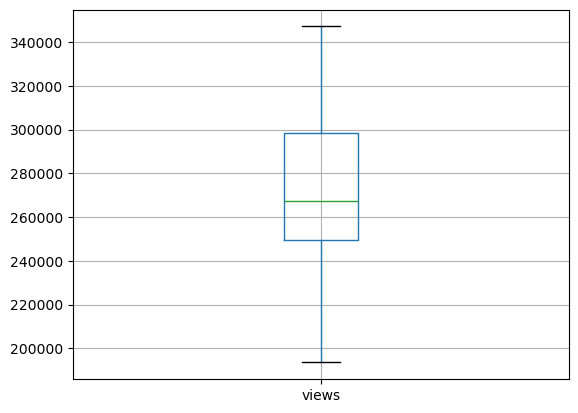

In [125]:
user_engagement_df.boxplot()